# Import

In [104]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import datetime

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Load

In [5]:
path = 'C:/Users/이가원/Desktop/data'

In [87]:
user_spec = pd.read_csv(path+'/user_spec.csv')
loan_result = pd.read_csv(path+'/loan_result.csv')
log_data = pd.read_csv(path+'/log_data.csv')

In [7]:
user_spec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394216 entries, 0 to 1394215
Data columns (total 17 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   application_id                       1394216 non-null  int64  
 1   user_id                              1394216 non-null  int64  
 2   birth_year                           1381255 non-null  float64
 3   gender                               1381255 non-null  float64
 4   insert_time                          1394216 non-null  object 
 5   credit_score                         1289101 non-null  float64
 6   yearly_income                        1394126 non-null  float64
 7   income_type                          1394131 non-null  object 
 8   company_enter_month                  1222456 non-null  float64
 9   employment_type                      1394131 non-null  object 
 10  houseown_type                        1394131 non-null  object 
 11

In [8]:
loan_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13527363 entries, 0 to 13527362
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   application_id         int64  
 1   loanapply_insert_time  object 
 2   bank_id                int64  
 3   product_id             int64  
 4   loan_limit             float64
 5   loan_rate              float64
 6   is_applied             float64
dtypes: float64(3), int64(3), object(1)
memory usage: 722.4+ MB


In [9]:
log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17843993 entries, 0 to 17843992
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   event           object
 2   timestamp       object
 3   mp_os           object
 4   mp_app_version  object
 5   date_cd         object
dtypes: int64(1), object(5)
memory usage: 816.8+ MB


# Data Preprocessing

In [88]:
# 날짜 type 변경
user_spec['insert_time'] = pd.to_datetime(user_spec.insert_time)
loan_result['loanapply_insert_time'] = pd.to_datetime(loan_result.loanapply_insert_time)
log_data['timestamp'] = pd.to_datetime(log_data.timestamp)

In [89]:
# 월, 일, 요일, 시간대 변수 생성
user_spec['month'] = user_spec.insert_time.dt.month
user_spec['day'] = user_spec.insert_time.dt.day
user_spec['weekday'] = user_spec.insert_time.dt.weekday
user_spec['time'] = user_spec.insert_time.dt.hour

loan_result['month'] = loan_result.loanapply_insert_time.dt.month
loan_result['day'] = loan_result.loanapply_insert_time.dt.day
loan_result['weekday'] = loan_result.loanapply_insert_time.dt.weekday
loan_result['time'] = loan_result.loanapply_insert_time.dt.hour

log_data['month'] = log_data.timestamp.dt.month
log_data['day'] = log_data.timestamp.dt.day
log_data['weekday'] = log_data.timestamp.dt.weekday
log_data['time'] = log_data.timestamp.dt.hour

In [90]:
user_spec_train = user_spec[user_spec['month'] <6].reset_index(drop=True)
loan_result_train = loan_result[loan_result['month'] <6].reset_index(drop=True)
log_data_train = log_data[log_data['month'] <6].reset_index(drop=True)

user_spec_test = user_spec[user_spec['month'] == 6].reset_index(drop=True)
loan_result_test = loan_result[loan_result['month'] ==6].reset_index(drop=True)
log_data_test = log_data[log_data['month'] ==6].reset_index(drop=True)

In [50]:
user_spec_train.shape

(1029390, 21)

In [53]:
user_spec_test.shape

(364826, 21)

In [51]:
loan_result_train.shape

(10270124, 11)

In [54]:
loan_result_test.shape

(3257239, 11)

In [52]:
log_data_train.shape

(12907328, 10)

In [55]:
log_data_test.shape

(4936665, 10)

## Missing_value

### Missing Value Check

In [91]:
user_spec.isnull().sum()

application_id                               0
user_id                                      0
birth_year                               12961
gender                                   12961
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
month                                        0
day                                          0
weekday                                      0
time                                         0
dtype: int64

In [92]:
loan_result.isnull().sum()

application_id                 0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                  7495
loan_rate                   7495
is_applied               3257239
month                          0
day                            0
weekday                        0
time                           0
dtype: int64

In [93]:
log_data.isnull().sum()

user_id                0
event                  0
timestamp              0
mp_os                980
mp_app_version    660597
date_cd                0
month                  0
day                    0
weekday                0
time                   0
dtype: int64

### Birth_year

In [74]:
def age(x):
    if x > 2004:
        return 10
    elif x > 1994:
        return 20
    elif x > 1984:
        return 30
    elif x > 1974:
        return 40
    elif x > 1964:
        return 50
    elif x > 1954:
        return 60
    elif x > 1944:
        return 70
    elif x > 1934:
        return 80
    elif x > 1924:
        return 90
    else:
        return np.nan

In [75]:
user_spec['age'] = user_spec.birth_year.apply(lambda x : age(x))
user_spec_train['age'] = user_spec_train.birth_year.apply(lambda x : age(x))

In [94]:
# birth_year가 nan인 user_id
user_id = user_spec[user_spec.birth_year.isna()].user_id

# birth_year가 nan값인 user의 birth_year 갯수
birth_df = user_spec[user_spec['user_id'].isin(user_id)].groupby('user_id')['birth_year'].nunique().reset_index()

birth_df['birth_year'].value_counts()

birth_year
0    6856
1    1411
Name: count, dtype: int64

In [95]:
birth_df_id = birth_df.user_id.to_list()

for idd in tqdm(birth_df_id):
    if birth_df[birth_df.user_id == idd].birth_year.values[0] == 1:
        miss_list = user_spec[user_spec.user_id == idd]['birth_year'].unique().tolist()
        miss = [x for x in miss_list if pd.isnull(x) == False][0]
        user_spec[user_spec.user_id == idd] = user_spec[user_spec.user_id == idd].fillna({'birth_year':miss})
    else:
        pass

100%|██████████| 8267/8267 [00:41<00:00, 198.20it/s]


In [96]:
user_spec.birth_year.isnull().sum()

9724

In [98]:
user_spec.birth_year.describe()

count    1.384492e+06
mean     1.983280e+03
std      1.067738e+01
min      1.927000e+03
25%      1.976000e+03
50%      1.984000e+03
75%      1.992000e+03
max      2.008000e+03
Name: birth_year, dtype: float64

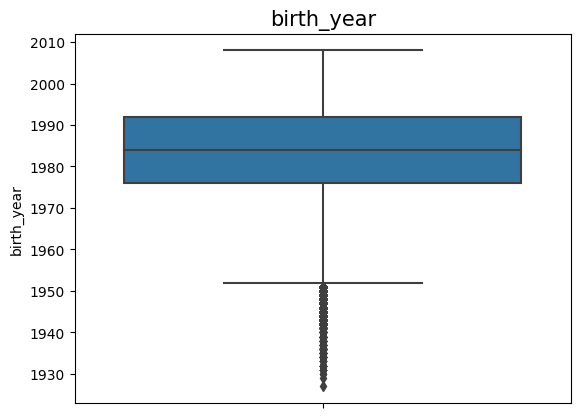

In [105]:
sns.boxplot(y = 'birth_year', data = user_spec)
plt.title('birth_year', size = 15)
plt.show()